This Python notebook uses a generated 'optimal design' result as input, and generates the associated formal verification source file (.smv). It is provided to ease new analyses and just for research purposes.

This was used in the following paper:
Jon Perez, Jose Luis Flores, Christian Blum, Jesús Cerquides, and Alex Abuin: Optimization Techniques and Formal Verification for the Software Design of Boolean Algebra Based Safety-Critical Systems. IEEE Transaction on Industrial Informatics, 2021. In press.

The structure of the notebook is:
 1. Setup the Python Environment
 2. Pre-process 'Design Optimization' Result --- This is the place where the given optimized result extracted from the output file (.out) must be transformed manually to string (2.1) and numpy array (2.2). For that purpose, an editor with column mode edition might be used.
 3. Generate Formal Verification file (.smv)

# Setup Python Environment

In [1]:
import numpy as np

#Date-Time
from datetime import date, datetime

#Graph
import matplotlib
import matplotlib.pyplot as plt

# Pre-process 'Design Optimization' Result

## Design Optimization Result (as String)

The 'best solution' provided in the output file must be manually translated into strings as shown below.
You have to transform the numeric tuples into string arrays. For example the following tuple
00000 00000001 001010
should be transformed into the following: 
["00000", "00000001", "001010"]

In [2]:
result_txt = np.array([
["00000", "01000000", "000000"],
["00001", "01011011", "001000"],
["00002", "01101010", "000101"],
["00010", "00100011", "010110"],
["00011", "00100110", "010100"],
["00012", "01010010", "001001"],
["00020", "00100110", "010110"],
["00021", "01100110", "000100"],
["00022", "00010010", "011001"],
["00100", "01001010", "000101"],
["00101", "00001010", "010101"],
["00102", "00001010", "010101"],
["00110", "01000011", "001010"],
["00111", "01000110", "000100"],
["00112", "00000010", "010101"],
["00120", "00000110", "010110"],
["00121", "00000110", "010100"],
["00122", "00000110", "010100"],
["00200", "10000001", "011010"],
["00201", "11001001", "001000"],
["00202", "01001011", "000100"],
["00210", "00000011", "011010"],
["00211", "01000010", "001000"],
["00212", "01000010", "000101"],
["00220", "00000110", "010110"],
["00221", "00000110", "010100"],
["00222", "00000110", "010100"],
["01000", "01100001", "100110"],
["01001", "01011001", "101000"],
["01002", "01101000", "100101"],
["01010", "01010001", "101010"],
["01011", "01010010", "001001"],
["01012", "01100010", "000101"],
["01020", "01100100", "100110"],
["01021", "01010110", "001000"],
["01022", "01010010", "001001"],
["01100", "01000001", "101010"],
["01101", "01001011", "000100"],
["01102", "01001011", "000100"],
["01110", "01000001", "101010"],
["01111", "01000010", "001000"],
["01112", "01000010", "000101"],
["01120", "01000010", "000111"],
["01121", "01000110", "000100"],
["01122", "01000010", "000101"],
["01200", "01000010", "000111"],
["01201", "01001011", "001000"],
["01202", "01001011", "001000"],
["01210", "01000011", "000110"],
["01211", "01000110", "000100"],
["01212", "01000110", "000100"],
["01220", "01000001", "101010"],
["01221", "01000110", "000100"],
["01222", "01000010", "000101"],
["02000", "01010011", "001010"],
["02001", "01101011", "000100"],
["02002", "01011010", "001001"],
["02010", "01010011", "001010"],
["02011", "01100010", "000101"],
["02012", "01010010", "001001"],
["02020", "01100010", "000111"],
["02021", "01010110", "001000"],
["02022", "01010010", "001001"],
["02100", "01001011", "000100"],
["02101", "01001011", "001000"],
["02102", "01001110", "000100"],
["02110", "01000011", "001010"],
["02111", "01000110", "000100"],
["02112", "01000010", "000101"],
["02120", "11000001", "001010"],
["02121", "01000110", "000100"],
["02122", "01000010", "000101"],
["02200", "01001000", "101000"],
["02201", "01001011", "000100"],
["02202", "01001011", "001000"],
["02210", "01000011", "001010"],
["02211", "01000010", "001000"],
["02212", "01000110", "000100"],
["02220", "11000001", "001010"],
["02221", "01000110", "000100"],
["02222", "01000110", "000100"],
["10000", "10010001", "011010"],
["10001", "10011100", "011000"],
["10002", "10101001", "010100"],
["10010", "10100001", "010110"],
["10011", "00010010", "011001"],
["10012", "00010110", "011000"],
["10020", "10100100", "010110"],
["10021", "00010110", "011000"],
["10022", "00100110", "010100"],
["10100", "00001011", "011000"],
["10101", "00001011", "011000"],
["10102", "00001010", "010101"],
["10110", "00000011", "010110"],
["10111", "00000110", "010100"],
["10112", "00000010", "010101"],
["10120", "00000011", "011010"],
["10121", "00000110", "010100"],
["10122", "00000010", "010101"],
["10200", "00000110", "010110"],
["10201", "10001001", "011000"],
["10202", "00001011", "011000"],
["10210", "00000110", "010110"],
["10211", "00000010", "011000"],
["10212", "00000010", "010101"],
["10220", "00000110", "010110"],
["10221", "00000110", "010100"],
["10222", "00000110", "010100"],
["11000", "10101001", "000100"],
["11001", "00101001", "100100"],
["11002", "10101001", "000100"],
["11010", "10100001", "000110"],
["11011", "00100000", "000100"],
["11012", "00010000", "001000"],
["11020", "00100001", "100110"],
["11021", "00010000", "001000"],
["11022", "00100000", "000100"],
["11100", "10001001", "001000"],
["11101", "10001001", "001000"],
["11102", "10001001", "001000"],
["11110", "10000001", "001010"],
["11111", "00000000", "000100"],
["11112", "00000000", "001000"],
["11120", "00000001", "101010"],
["11121", "00000000", "001000"],
["11122", "00000000", "000100"],
["11200", "10001001", "001000"],
["11201", "10001001", "001000"],
["11202", "00001001", "101000"],
["11210", "00000001", "101010"],
["11211", "00000000", "000100"],
["11212", "00000000", "000100"],
["11220", "10000001", "001010"],
["11221", "00000000", "000100"],
["11222", "00000000", "000100"],
["12000", "10100001", "000110"],
["12001", "00011001", "101000"],
["12002", "10101001", "000100"],
["12010", "10010001", "001010"],
["12011", "00100000", "000100"],
["12012", "00100000", "000100"],
["12020", "00010001", "101010"],
["12021", "00100000", "000100"],
["12022", "00100000", "000100"],
["12100", "10001001", "001000"],
["12101", "10001001", "001000"],
["12102", "10001001", "001000"],
["12110", "00000001", "101010"],
["12111", "00000000", "000100"],
["12112", "00000000", "001000"],
["12120", "10000001", "001010"],
["12121", "00000000", "001000"],
["12122", "00000000", "001000"],
["12200", "00000001", "101010"],
["12201", "10001001", "001000"],
["12202", "00001001", "000100"],
["12210", "00000001", "101010"],
["12211", "00000000", "000100"],
["12212", "00000000", "001000"],
["12220", "10000001", "001010"],
["12221", "00000000", "000100"],
["12222", "00000000", "001000"],
["20000", "00011110", "010000"],
["20001", "00011011", "011000"],
["20002", "00101010", "010101"],
["20010", "00010011", "011010"],
["20011", "00010110", "011000"],
["20012", "00100010", "010101"],
["20020", "00100110", "010110"],
["20021", "00010110", "011000"],
["20022", "00100010", "010101"],
["20100", "00001011", "011000"],
["20101", "00001011", "011000"],
["20102", "00001011", "010100"],
["20110", "00000011", "011010"],
["20111", "00000110", "010100"],
["20112", "00000110", "010100"],
["20120", "10000001", "011010"],
["20121", "00000110", "010100"],
["20122", "00000010", "010101"],
["20200", "00001011", "010100"],
["20201", "00001110", "010100"],
["20202", "00001011", "011000"],
["20210", "00000011", "011010"],
["20211", "00000010", "011000"],
["20212", "00000110", "010100"],
["20220", "00000011", "010110"],
["20221", "00000110", "010100"],
["20222", "00000110", "010100"],
["21000", "00101001", "100100"],
["21001", "00101001", "100100"],
["21002", "00011001", "101000"],
["21010", "00010001", "101010"],
["21011", "00010000", "001000"],
["21012", "00100000", "000100"],
["21020", "00010001", "101010"],
["21021", "00010000", "001000"],
["21022", "00100000", "000100"],
["21100", "00001001", "101000"],
["21101", "00001001", "101000"],
["21102", "10001001", "001000"],
["21110", "00000001", "101010"],
["21111", "00000000", "001000"],
["21112", "00000000", "000100"],
["21120", "00000001", "101010"],
["21121", "00000000", "000100"],
["21122", "00000000", "001000"],
["21200", "00001001", "000100"],
["21201", "00001001", "101000"],
["21202", "00001001", "001000"],
["21210", "00000001", "101010"],
["21211", "00000000", "001000"],
["21212", "00000000", "001000"],
["21220", "00000001", "101010"],
["21221", "00000000", "001000"],
["21222", "00000000", "001000"],
["22000", "00010001", "101010"],
["22001", "00101001", "100100"],
["22002", "00101001", "100100"],
["22010", "00010001", "101010"],
["22011", "00100000", "000100"],
["22012", "00100000", "000100"],
["22020", "10100001", "000110"],
["22021", "00010000", "001000"],
["22022", "00100000", "000100"],
["22100", "10000001", "001010"],
["22101", "10001001", "001000"],
["22102", "10001001", "001000"],
["22110", "00000001", "101010"],
["22111", "00000000", "000100"],
["22112", "00000000", "000100"],
["22120", "00000001", "101010"],
["22121", "00000000", "000100"],
["22122", "00000000", "000100"],
["22200", "10000001", "001010"],
["22201", "10001001", "001000"],
["22202", "00001001", "101000"],
["22210", "10000001", "001010"],
["22211", "00000000", "000100"],
["22212", "00000000", "001000"],
["22220", "00000001", "101010"],
["22221", "00000000", "001000"],
["22222", "00000000", "000100"]
])


## Design Optimization Result (as np.array)

The 'best solution' provided in the output file must be manually translated into a numpy array as shown below.
You have to transform the numeric tuples into arrays of separate numbers. For example from the following tuple 
00000 00000001 001010
should be transformed into the following: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]

In [3]:
result = np.array(
    [
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], 
    [0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0], 
    [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], 
    [0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 
    [0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], 
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1], 
    [0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1], 
    [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], 
    [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], 
    [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 
    [0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0], 
    [0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 
    [0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0], 
    [0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 
    [0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 
    [0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0], 
    [0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], 
    [0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1], 
    [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], 
    [0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0], 
    [0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], 
    [0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], 
    [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 
    [0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 
    [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 
    [0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1], 
    [0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1], 
    [0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], 
    [0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], 
    [0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0], 
    [0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], 
    [0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 
    [0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1], 
    [0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], 
    [0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [0, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], 
    [0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1], 
    [0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], 
    [0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], 
    [0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 
    [0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], 
    [0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], 
    [0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 
    [0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0], 
    [0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 
    [0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], 
    [0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], 
    [0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 
    [0, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 
    [0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 
    [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0], 
    [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0], 
    [1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0], 
    [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], 
    [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], 
    [1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 
    [1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0], 
    [1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 
    [1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], 
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], 
    [1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1], 
    [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0], 
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], 
    [1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0], 
    [1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], 
    [1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 
    [1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0], 
    [1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], 
    [1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 
    [1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], 
    [1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], 
    [1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 
    [1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
    [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], 
    [1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
    [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], 
    [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0], 
    [1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], 
    [1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 
    [1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], 
    [1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], 
    [1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
    [1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 
    [1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 
    [1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
    [1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 
    [1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0], 
    [2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], 
    [2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1], 
    [2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0], 
    [2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 
    [2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], 
    [2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 
    [2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 
    [2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], 
    [2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], 
    [2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], 
    [2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0], 
    [2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0], 
    [2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0], 
    [2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], 
    [2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0], 
    [2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], 
    [2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0], 
    [2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], 
    [2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0], 
    [2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], 
    [2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], 
    [2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], 
    [2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], 
    [2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], 
    [2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], 
    [2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], 
    [2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], 
    [2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], 
    [2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], 
    [2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 
    [2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [2, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 
    [2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 
    [2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], 
    [2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 
    [2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 
    [2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 
    [2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    ]
)

## Define truth-table symbols in different formats: string, symbol, index

In [4]:
#String Definitions
str_txt_X = np.array([
    ['!s1', '!s2', '!s3', '!s4', '!s5', '!d1', '!d2', '!d3', '!d4', '!d5'],
    [' s1', ' s2', ' s3', ' s4', ' s5', ' d1', ' d2', ' d3', ' d4', ' d5']])
str_txt_Y = np.array([
    ['!u1', '!u2', '!u3', '!u4', '!u5', '!u6', '!u7', '!u8', '!l1', '!l2', '!l3', '!l4', '!l5', '!l6'],
    [' u1', ' u2', ' u3', ' u4', ' u5', ' u6', ' u7', ' u8', ' l1', ' l2', ' l3', ' l4', ' l5', ' l6']])

## Process and generate truth-table (np.array)
Process the given optimized table to generate the truth-table:

In [5]:
#Generate truth-table output (Y): txt (text) and binary values
U = result[:,5:13]
L = result[:,13:19]
Y = np.concatenate((U, L),axis=1)

#Generate truth-table input (X)
X2 = result[:,0:5] #Get X defined with values 0..2
S  = (X2 > 0)      #Section occupied if xi > 0
D  = (X2 > 1)      #Section direction based on 2 or 1
S  = S.astype(int) #Convert Boolean array to int
D  = D.astype(int) #Convert Boolean array to int
X  = np.concatenate((S, D),axis=1) #X = S, D

## Plot truth-table

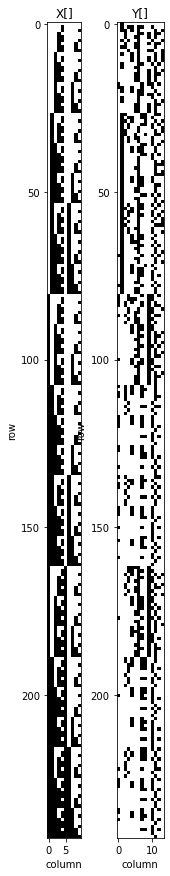

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(2.5, 15))

ax[0].imshow(X, cmap='Greys',  interpolation='nearest')
ax[0].set(xlabel='column', ylabel='row', title='X[]')

ax[1].imshow(Y, cmap='Greys',  interpolation='nearest')
ax[1].set(xlabel='column', ylabel='row', title='Y[]')

plt.show()

# Generate Formal Verification file (smv)

## Define functions

In [7]:
def nusmv_truth_table_x(X):
    idx_max  = X.shape[1]
    idx_sep  = (idx_max / 2) - 1
    idx_line = 1
    l_X      = X.tolist()
    l_str_x  = []
    str_def  = ""
    for x_i in l_X:
        str_x = "S"
        idx   = 0
        for sd_i in x_i:
            str_x += str(sd_i)
            if (idx == idx_sep):
                str_x += "_"
            idx += 1    
        l_str_x.append(str_x)
        str_line = "\n" + str_x + " := "

        idx = 0
        for sd_i in x_i:
            str_line += str_txt_X[int(sd_i), idx]
            if (idx < idx_max - 1): 
                str_line += " & "
            else: 
                str_line += ";"
            idx += 1
        str_line += " -- Row[" + str(idx_line) + "]"
        idx_line += 1
        str_def += str_line
    return str_def, l_str_x

def nusmv_truth_table_y(l_str_x, Y, b_end = False):
    idx_line     = 0
    idx_max      = Y.shape[1]
    idx_line_max = Y.shape[0]
    str_def      = ""
    l_Y = Y.tolist()
    for y_i in l_Y:
        str_line = "\n (" + l_str_x[idx_line] + " -> next ("
        idx   = 0
        for sd_i in y_i:
            str_line += str_txt_Y[int(sd_i), idx] 
            #print(" idx =", idx, " idx_max = ", idx_max, " str_line = ", str_line)
            if (idx < idx_max - 1): 
                str_line += " & "
            idx += 1

        str_line += "))"
        if (b_end):
            if (idx_line < idx_line_max - 1): 
                str_line += " & "
            else:
                str_line += ";"
        else:
            str_line += " & "
        str_line += " -- Row[" + str(idx_line + 1) + "]" 
        idx_line += 1
        str_def += str_line 
    return str_def

def int_2_bool_vector(number, num_bits):
    assert num_bits > 1
    v_b = (np.zeros(num_bits)).astype(int)
    str_bin = bin(number)[2:].zfill(num_bits) 
    idx = 0
    for c in str_bin:
        if (c == '1'):
            v_b[idx] = 1
#        print("idx=", idx, " c=",c, ", v_b=", v_b)
        if (idx < num_bits - 1):
            idx += 1
    return v_b

def table_x_not_defined(X):
    #Generate a vector with all possible boolean combinations for num_bits = X.shape[1], without the values already defined in X
    num_bits   = X.shape[1]
    number_max = 2**num_bits
    l_x_diff   = []
    for idx in range(0, number_max):
        x       = int_2_bool_vector(idx, num_bits)
        b_found = False        
        for x_i in X:
#            print("x=",x, ", x_i=", x_i)
            if np.array_equal(x, x_i):
                b_found = True
        if (b_found == False):
            l_x_diff.append(x)        
    return l_x_diff

def nusmv_truth_table_x_not_defined(X):
    str_def, l_str_x = nusmv_truth_table_x(np.array(table_x_not_defined(X)))
    return str_def

def nusmv_truth_table_y_not_defined(X, Y):
    l_x_diff = np.array(table_x_not_defined(X))
    Y_null   = np.zeros((l_x_diff.shape[0], Y.shape[1]))
    
    idx_max  = l_x_diff.shape[1]
    idx_sep  = (idx_max / 2) - 1
    idx_line = 1
    l_X      = l_x_diff.tolist()
    l_str_x  = []
    str_def  = ""
    for x_i in l_X:
        str_x = "S"
        idx   = 0
        for sd_i in x_i:
            str_x += str(sd_i)
            if (idx == idx_sep):
                str_x += "_"
            idx += 1    
        l_str_x.append(str_x)
        
    return nusmv_truth_table_y(l_str_x, Y_null, True)

## Generate NuSMV file

This section creates the formal verification source code: formal_verification.smv

If you have already installed NuSMV tool, you can execute it using the following command line (not Python):
NuSMV formal_verification.smv

In [8]:
f = open("formal_verfication.smv", "w")

#-------------------------------------------    
#File header
#-------------------------------------------    
f.write("-- *************************************************************************")
f.write("\n--   NuSMV formal verification file for Safety Boolean Algebra case-study")
f.write("\n--   Date: " + str(datetime.now()))
f.write("\n-- **************************************************************************")
f.write("\n")

#-------------------------------------------    
#Variables definition
#-------------------------------------------    
f.write("MODULE main\n")
f.write("-- OUTPUT VARIABLES\n")
f.write("""VAR
    --false - 0 - Red; 
    --true - 1 - Green; 
    u1:boolean; u2:boolean; u3:boolean; u4:boolean; 
    u5:boolean; u6:boolean; u7:boolean; u8:boolean; 
    l1:boolean; l2:boolean; l3:boolean; 
    l4:boolean; l5:boolean; l6:boolean;""")
 
f.write("\n-- INPUT VARIABLES\n")  
f.write("""IVAR
    --false - 0 - Busy; 
    --true - 1 - Free;
    s1:boolean; s2:boolean; s3:boolean; s4:boolean; s5:boolean;
    d1:boolean; d2:boolean; d3:boolean; d4:boolean; d5:boolean;
    """)

#-------------------------------------------    
#Define Truth Table [X]
#-------------------------------------------    
f.write("\n\n-- DEFINE TRUTH TABLE [X]")
f.write("\nDEFINE")
f.write("\n -- Design content")
str_def, l_str_x = nusmv_truth_table_x(X)
f.write(str_def)
f.write("\n -- Content not defined in the design, but required for definition completeness")
f.write(nusmv_truth_table_x_not_defined(X))

#-------------------------------------------    
#Initialize
#-------------------------------------------    
f.write("\n\n\n-- INITIALIZE:\n")  
f.write("""INIT
    -- "all in red" init state
    !u1 & !u2 & !u3 & !u4 & !u5 & !u6 & !u7 & !u8 & !l1 & !l2 & !l3 & !l4 & !l5 & !l6;""")

#-------------------------------------------    
#Define Truth Table tranistions [X]->[Y]
#-------------------------------------------    
f.write("\n\n-- DEFINE TRUTH TABLE TRANSITIONS [X]->[Y]")
f.write("\nTRANS")
f.write("\n    --(table)")
f.write("\n    -- Design content")
f.write(nusmv_truth_table_y(l_str_x, Y))
f.write("\n -- Content not defined in the design, but required for definition completeness")
f.write(nusmv_truth_table_y_not_defined(X, Y))

#-------------------------------------------    
# CHECK:FAIRNESS TRUE
#-------------------------------------------    

f.write("""\n\n\nFAIRNESS TRUE;

LTLSPEC G (  u1 -> !l1)                           -- Rule 1
LTLSPEC G (  u6 -> !l6)                           -- Rule 2
LTLSPEC G ( s1 -> X !u2)                          -- Rule 3
LTLSPEC G ( s2 -> X !l2)                          -- Rule 4
LTLSPEC G ( s3 -> X !u3)                          -- Rule 5
LTLSPEC G ( s3 -> X !u4)                          -- Rule 6
LTLSPEC G ( s4 -> X !u5)                          -- Rule 7
LTLSPEC G ( s5 -> X !l5)                          -- Rule 8
LTLSPEC G ( ((!u3 & !l3) | (!u5 & !l5)) -> !u1 )  -- Rule 9
LTLSPEC G ( ((!u3 & !l3) | (!u5 & !l5)) -> !l1 )  -- Rule 10
LTLSPEC G ( ((!u2 & !l2) | (!u4 & !l4)) -> !u6 )  -- Rule 11
LTLSPEC G ( ((!u2 & !l2) | (!u4 & !l4)) -> !l6 )  -- Rule 12
LTLSPEC G ((!u2 & !l2) -> !u7)                    -- Rule 13
LTLSPEC G ((!u5 & !l5) -> !u8)                    -- Rule 14
LTLSPEC G (u3 -> !u4)                             -- Rule 15
LTLSPEC G (l3 -> !l4)                             -- Rule 16
LTLSPEC G (u2 -> !l2)                             -- Rule 17
LTLSPEC G (u3 -> !l3)                             -- Rule 18
LTLSPEC G (u4 -> !l4)                             -- Rule 19
LTLSPEC G (u5 -> !l5)                             -- Rule 20
LTLSPEC G ((u1 | l1) -> !u7)                      -- Rule 21
LTLSPEC G ((u6 | l6) -> !u8)                      -- Rule 22""")


#-------------------------------------------    
# End of file and close file
#-------------------------------------------    
f.write("\n\n\n\n -- End of File")
f.close()